# GALSEN AI Fraud Detection Competition

### Importation des bibliothèques

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
print(f"Version de pandas: {pd.__version__}")
print(f"Version de numpy: {np.__version__}")
print(f"Version de seaborn: {sns.__version__}")

Version de pandas: 2.2.2
Version de numpy: 1.26.4
Version de seaborn: 0.13.2


### Description des données

In [109]:
data_des = pd.read_csv('data/Xente_Variable_Definitions.csv')

print(data_des.to_markdown())

|    | Column Name          | Definition                                                                                                        |
|---:|:---------------------|:------------------------------------------------------------------------------------------------------------------|
|  0 | TransactionId        | Unique �transaction identifier on platform                                                                        |
|  1 | BatchId              | Unique number assigned to a batch of transactions for processing                                                  |
|  2 | AccountId            | Unique number identifying the customer on platform                                                                |
|  3 | SubscriptionId       | Unique number identifying the customer subscription                                                               |
|  4 | CustomerId           | Unique identifier attached to Account                                                         

### Chargement des données

In [110]:
TRAIN_PATH = 'data/training.csv'
TEST_PATH = 'data/test.csv'

train_data = pd.read_csv(TRAIN_PATH)
test_data = pd.read_csv(TEST_PATH)

Test_TransactionId = test_data['TransactionId']

train_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [111]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [112]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         45019 non-null  object 
 1   BatchId               45019 non-null  object 
 2   AccountId             45019 non-null  object 
 3   SubscriptionId        45019 non-null  object 
 4   CustomerId            45019 non-null  object 
 5   CurrencyCode          45019 non-null  object 
 6   CountryCode           45019 non-null  int64  
 7   ProviderId            45019 non-null  object 
 8   ProductId             45019 non-null  object 
 9   ProductCategory       45019 non-null  object 
 10  ChannelId             45019 non-null  object 
 11  Amount                45019 non-null  float64
 12  Value                 45019 non-null  int64  
 13  TransactionStartTime  45019 non-null  object 
 14  PricingStrategy       45019 non-null  int64  
dtypes: float64(1), int6

### Identification des variables discrètes et continues

 - Variables continues: **Amount** et **Value**
 
 - Variables discrètes: Le reste des colonnes

### Analyse Exploratoire des données

|   FraudResult |   proportion |
|--------------:|-------------:|
|             0 |   0.997982   |
|             1 |   0.00201752 |


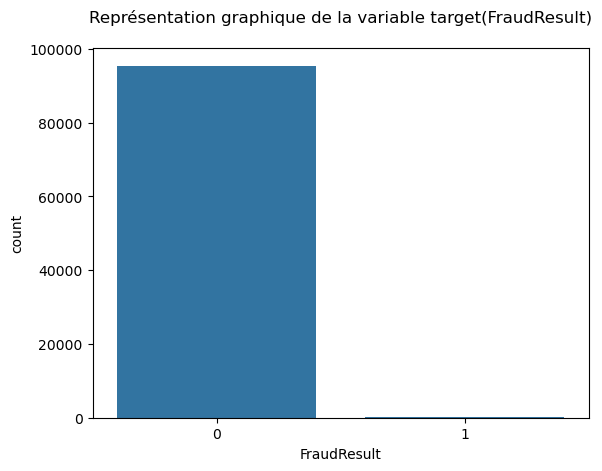

In [113]:
sns.countplot(train_data, x='FraudResult')
plt.title("Représentation graphique de la variable target(FraudResult)\n")

print(train_data['FraudResult'].value_counts(normalize=True).to_markdown())

Nous constatons un déséquilibre de notre variable target. Nous avons plus d'exemple de cas de non fraude que de cas de fraude dans notre dataset.

 - **Prportion fraude**: **0.00201752**

 - **Proportion non fraude**: **0.997982**

#### Analyse des variables continues

In [114]:
train_data['Value'].describe()

count    9.566200e+04
mean     9.900584e+03
std      1.231221e+05
min      2.000000e+00
25%      2.750000e+02
50%      1.000000e+03
75%      5.000000e+03
max      9.880000e+06
Name: Value, dtype: float64

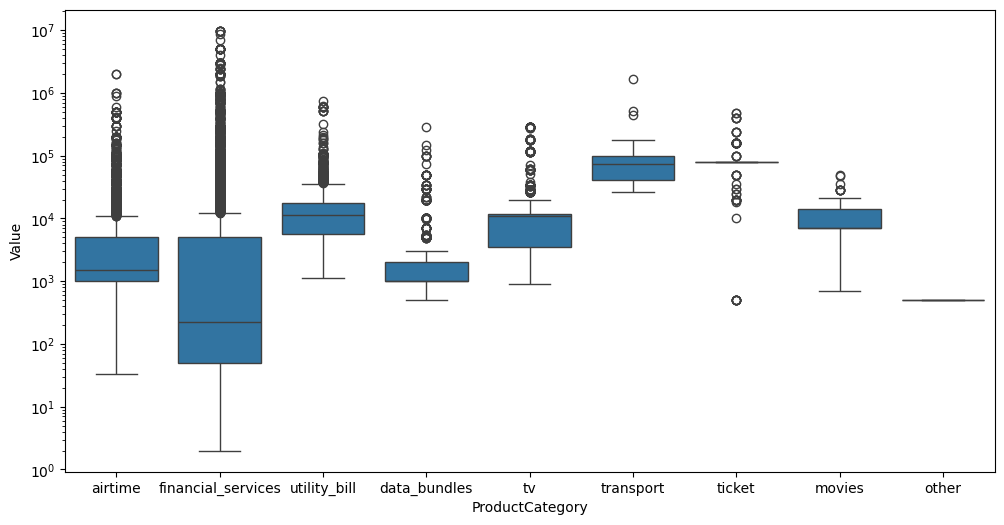

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(train_data, y='Value', x='ProductCategory')
plt.yscale('log')

#### Analyse des variables discrètes

| ProductCategory    |     0 |   1 |
|:-------------------|------:|----:|
| airtime            | 45009 |  18 |
| data_bundles       |  1613 |   0 |
| financial_services | 45244 | 161 |
| movies             |   175 |   0 |
| other              |     2 |   0 |
| ticket             |   216 |   0 |
| transport          |    23 |   2 |
| tv                 |  1279 |   0 |
| utility_bill       |  1908 |  12 |


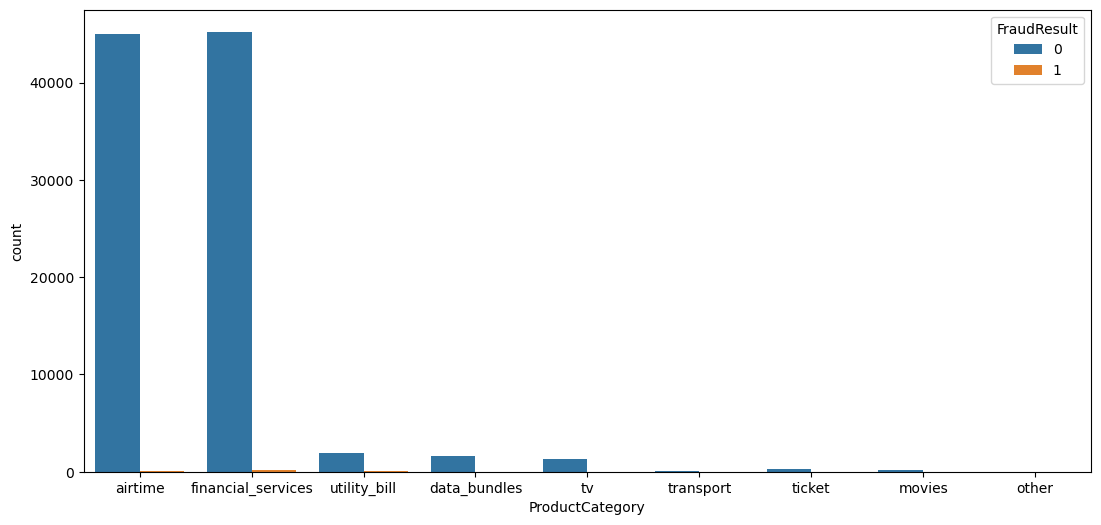

In [116]:
plt.figure(figsize=(13,6))
sns.countplot(train_data, x='ProductCategory', orient='y', hue='FraudResult')

counts = train_data.groupby(['ProductCategory', 'FraudResult']).size().unstack(fill_value=0)
print(counts.to_markdown())

##### ChanelId

In [117]:
print(train_data['ChannelId'].value_counts().to_markdown())

| ChannelId   |   count |
|:------------|--------:|
| ChannelId_3 |   56935 |
| ChannelId_2 |   37141 |
| ChannelId_5 |    1048 |
| ChannelId_1 |     538 |


##### PricingStrategy

In [118]:
print(train_data['PricingStrategy'].value_counts().to_markdown())


|   PricingStrategy |   count |
|------------------:|--------:|
|                 2 |   79848 |
|                 4 |   13562 |
|                 1 |    1867 |
|                 0 |     385 |


<Axes: xlabel='PricingStrategy', ylabel='ProductCategory'>

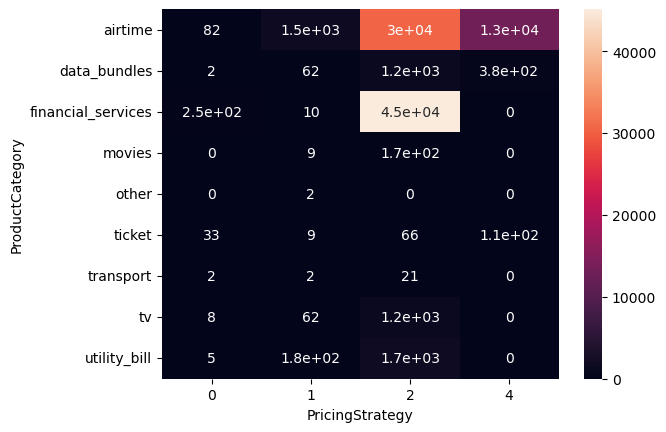

In [119]:
sns.heatmap(pd.crosstab(train_data['ProductCategory'], train_data['PricingStrategy']), annot=True)

In [120]:
train_data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

### Feature Engineering

In [121]:
# Extraction des dates
def extract_datetime_features(df: pd.DataFrame, datetime_col: str):
    
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
    datetime_features = {
        f'{datetime_col}_dow': df[datetime_col].dt.day_name(),
        f'{datetime_col}_doy': df[datetime_col].dt.dayofyear,
        f'{datetime_col}_dom': df[datetime_col].dt.day,
        f'{datetime_col}_hr': df[datetime_col].dt.hour,
        f'{datetime_col}_min': df[datetime_col].dt.minute,
        f'{datetime_col}_is_wkd': df[datetime_col].dt.weekday >= 5,
        f'{datetime_col}_yr': df[datetime_col].dt.year,
        f'{datetime_col}_qtr': df[datetime_col].dt.quarter,
        f'{datetime_col}_mth': df[datetime_col].dt.month
    }
    df.drop(columns=datetime_col, inplace=True)
    return datetime_features
    

In [122]:
date_train_features = extract_datetime_features(train_data, 'TransactionStartTime')
train_data = train_data.assign(**date_train_features)

date_test_features = extract_datetime_features(test_data, 'TransactionStartTime')
test_data = test_data.assign(**date_test_features)

In [123]:
# Transformstion de la variable Amount
train_data['Amount_type'] = train_data['Amount'].apply(lambda val: 0 if val< 0 else 1)
test_data['Amount_type'] = test_data['Amount'].apply(lambda val: 0 if val< 0 else 1)

**Colonnes à supprimer**:  'TransactionId', 'BatchId', 'CurrencyCode', 'CountryCode', 'Amount'

In [124]:
features_to_remove = ['TransactionId', 'BatchId', 'CurrencyCode', 'CountryCode', 'Amount']

X_train = train_data.drop(columns=features_to_remove)
X_test = test_data.drop(columns=features_to_remove) 

X_train

,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Value,PricingStrategy,FraudResult,TransactionStartTime_dow,TransactionStartTime_doy,TransactionStartTime_dom,TransactionStartTime_hr,TransactionStartTime_min,TransactionStartTime_is_wkd,TransactionStartTime_yr,TransactionStartTime_qtr,TransactionStartTime_mth,Amount_type
0,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000,2,0,Thursday,319,15,2,18,False,2018,4,11,1
1,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,20,2,0,Thursday,319,15,2,19,False,2018,4,11,0
2,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500,2,0,Thursday,319,15,2,44,False,2018,4,11,1
3,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,21800,2,0,Thursday,319,15,3,32,False,2018,4,11,1
4,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,644,2,0,Thursday,319,15,3,34,False,2018,4,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,financial_services,ChannelId_2,1000,2,0,Wednesday,44,13,9,54,False,2019,1,2,0
95658,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000,2,0,Wednesday,44,13,9,54,False,2019,1,2,1
95659,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,financial_services,ChannelId_2,20,2,0,Wednesday,44,13,9,54,False,2019,1,2,0
95660,AccountId_1346,SubscriptionId_652,CustomerId_1709,ProviderId_6,ProductId_19,tv,ChannelId_3,3000,2,0,Wednesday,44,13,10,1,False,2019,1,2,1


#### Next Step Model